## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Load the data into pandas dataframe . Load the Boston Housing DataSet from data/boston_house_prices.csv**

In [3]:
df = pd.read_csv("data/boston_house_prices.csv", header=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Data preprocessing**

Check for missing values in all the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Data Visualization**

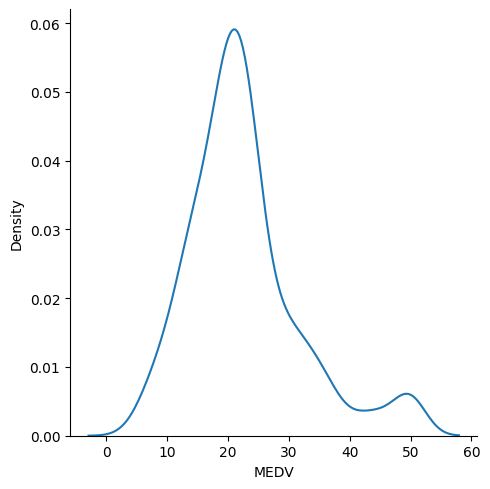

In [7]:
sns.displot(df['MEDV'], kind="kde")

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

<Axes: >

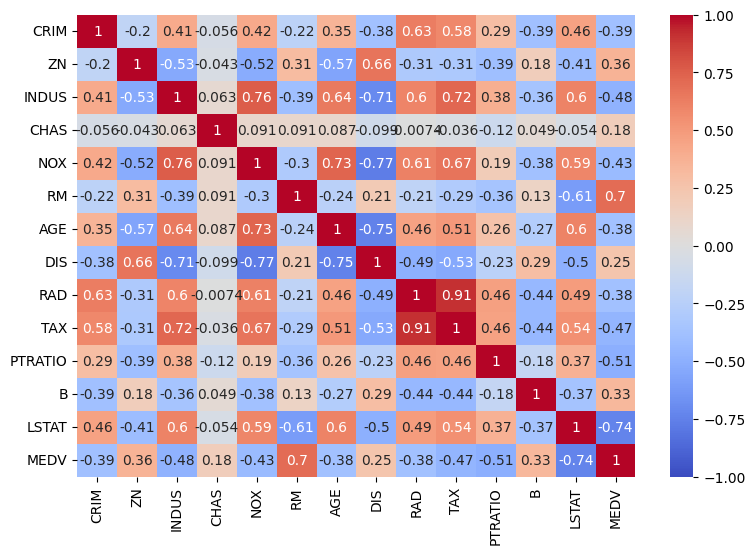

In [13]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1)

* LSTAT y RM son las variables más correladas con el target.

In [14]:
df.drop(columns=["RAD"], inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<Axes: xlabel='RM', ylabel='MEDV'>

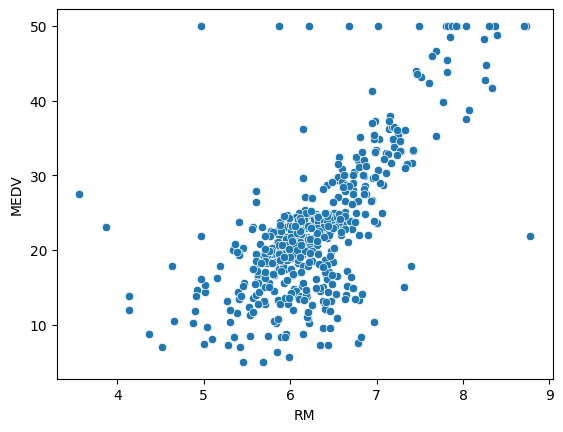

In [15]:
sns.scatterplot(x=df['RM'], y = df['MEDV'])

<Axes: xlabel='LSTAT', ylabel='MEDV'>

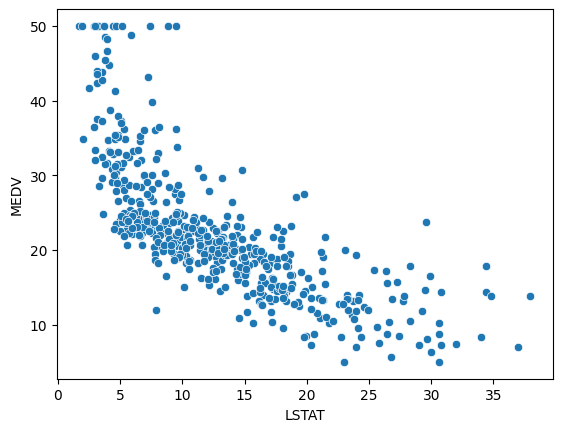

In [16]:
sns.scatterplot(x=df['LSTAT'], y = df['MEDV'])

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [17]:
X = df[['RM','LSTAT']]
y = df['MEDV']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [34]:
train_predictions = lin_reg.predict(X_train)

print(lin_reg.score(X_train, y_train))
print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))

0.6363353379616082
MAE train 3.798063422689011
MSE train 27.98794118547948


In [35]:
test_predictions = lin_reg.predict(X_test)

print(lin_reg.score(X_test, y_test))
print("MAE test", mean_absolute_error(y_test, test_predictions))
print("MSE test", mean_squared_error(y_test, test_predictions))

0.6041142735229119
MAE test 4.582645892343419
MSE test 41.40202341152383


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

<Axes: xlabel='MEDV'>

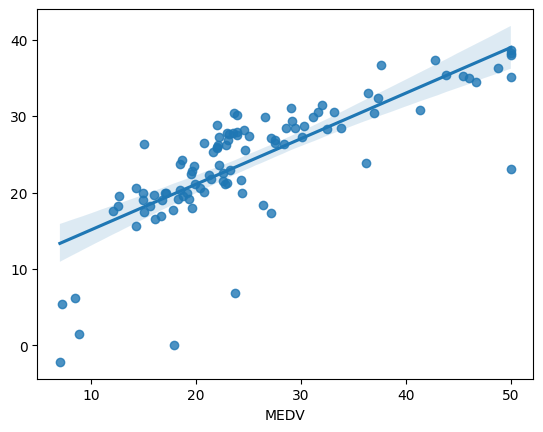

In [24]:
sns.regplot(x=y_test, y=test_predictions)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [37]:
pol_reg_2 = LinearRegression()
pol_reg_2.fit(X_train_poly, y_train)

LinearRegression()

**Did the model improve using the Polynomial model?**

In [38]:
train_predictions = pol_reg_2.predict(X_train_poly)

print(pol_reg_2.score(X_train_poly, y_train))
print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))

0.7526744600340032
MAE train 3.0194990832234727
MSE train 19.034383564891193


In [39]:
test_predictions = pol_reg_2.predict(X_test_poly)

print(pol_reg_2.score(X_test_poly, y_test))
print("MAE test", mean_absolute_error(y_test, test_predictions))
print("MSE test", mean_squared_error(y_test, test_predictions))

0.7485007375000425
MAE test 3.5422408760579787
MSE test 26.301979732039786


**Did the model improve using the Polynomial model with degree 3? Or more?**

In [41]:
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_train_poly, y_train)


train_predictions = pol_reg_3.predict(X_train_poly)

print(pol_reg_3.score(X_train_poly, y_train))
print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))

test_predictions = pol_reg_3.predict(X_test_poly)

print(pol_reg_3.score(X_test_poly, y_test))
print("MAE test", mean_absolute_error(y_test, test_predictions))
print("MSE test", mean_squared_error(y_test, test_predictions))

0.7688165765778632
MAE train 2.908202831717163
MSE train 17.79207256907875
0.7504651949495681
MAE test 3.5420021790793244
MSE test 26.09653531240899


In [42]:
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

pol_reg_4 = LinearRegression()
pol_reg_4.fit(X_train_poly, y_train)


train_predictions = pol_reg_4.predict(X_train_poly)

print(pol_reg_4.score(X_train_poly, y_train))
print("MAE train", mean_absolute_error(y_train, train_predictions))
print("MSE train", mean_squared_error(y_train, train_predictions))

test_predictions = pol_reg_4.predict(X_test_poly)

print(pol_reg_4.score(X_test_poly, y_test))
print("MAE test", mean_absolute_error(y_test, test_predictions))
print("MSE test", mean_squared_error(y_test, test_predictions))

0.8115227871427741
MAE train 2.700230995250689
MSE train 14.50536634129782
0.6688023261862086
MAE test 3.8712993251952605
MSE test 34.636898801842555


In [43]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(lin_reg, X, y, scoring="neg_mean_absolute_error", cv=10)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[-2.74282364 -2.66486168 -2.89248316 -5.15153202 -3.9402028  -4.64564316
 -3.82923301 -8.69643448 -6.53638215 -2.94554412]
-4.404514022690067
1.8528516111956599
